In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

df = pd.read_csv('income.csv')
df.sample(3)

,Name,Age,Income($)
21,Abdul,39,58000
7,Andrea,38,162000
16,Dipika,40,65000


Temos este dataset e queremos fazer clusters, não temos labels (Não supervisionado)

Precisamos de um número k de clusters para inicializar o modelo : 

Para isso utilizamos o elbow method : 

In [183]:
sse = []

for k in range(1,11):
    km = KMeans(n_clusters=k, init='k-means++')
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
sse

[39748148458.54546,
 3318233941.1619043,
 1606229737.6785712,
 1058800432.7238097,
 296500418.0952381,
 240467079.12857145,
 213200325.96666667,
 160833588.66666666,
 95133611.78333335,
 78216781.53333332]

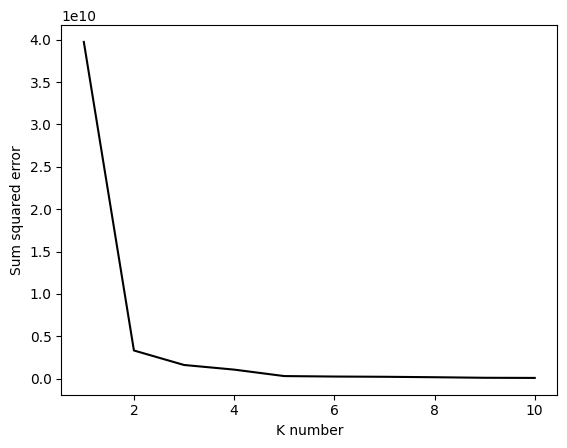

In [184]:
plt.plot(range(1,11), sse, color='black')
plt.xlabel('K number')
plt.ylabel('Sum squared error')
plt.show()

Podemos também fazer um scatter plot para melhor visualizar:

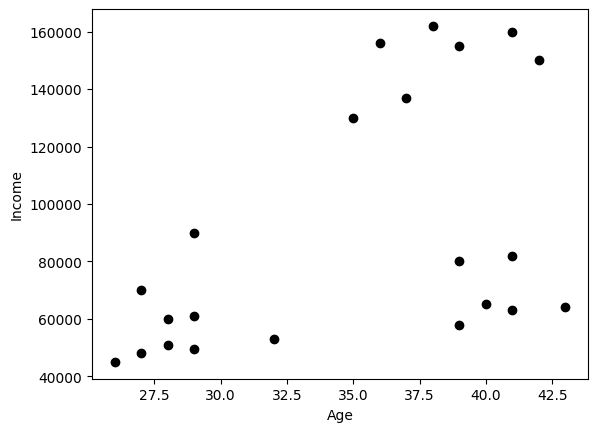

In [185]:
plt.scatter(df['Age'], df['Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

Fazemos K = 3 pois este parece ser o número de clusters

In [186]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
df.drop(columns=['Name'], inplace=True)

Fazemos um predict no modelo e passamos apenas o dataframe, não precisa fazer treino e teste pois não temos label : 


In [187]:
predictions = Kmeans.fit_predict(df)

In [188]:
df['Cluster'] = predictions
predictions

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

Separamos onde o cluster resultou em 0,1,2 para plotarmos o scatter : 

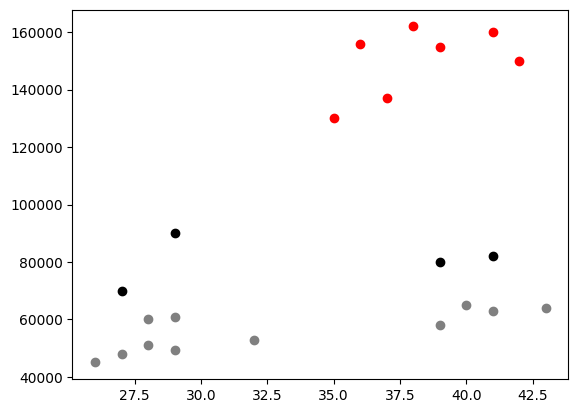

In [189]:
cluster1 = df[df['Cluster'] == 0]
cluster2 = df[df['Cluster'] == 1]
cluster3 = df[df['Cluster'] == 2]

plt.scatter(cluster1['Age'], cluster1['Income($)'], color='gray')
plt.scatter(cluster2['Age'], cluster2['Income($)'], color='red')
plt.scatter(cluster3['Age'], cluster3['Income($)'], color='black')

Resultamos em erro de cluster pois temos um problema de scaling, Age está variando de aproximadamente 0 a 50 e Income de 40000 a 160000

Fazendo a normalização:

In [190]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)']])

In [192]:
df.drop(columns=['Cluster'], inplace=True)

Com os dados normalizados, agora podemos fazer as previsões do modelo e plotar os (x,y ) de cada cluster

In [203]:
clusters = Kmeans.fit_predict(df)
clusters

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [204]:
df['Cluster'] = clusters
df

,Age,Income($),Cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,2
5,0.764706,0.940171,2
6,0.882353,0.982906,2
7,0.705882,1.000000,2
8,0.588235,0.948718,2
9,0.529412,0.726496,2


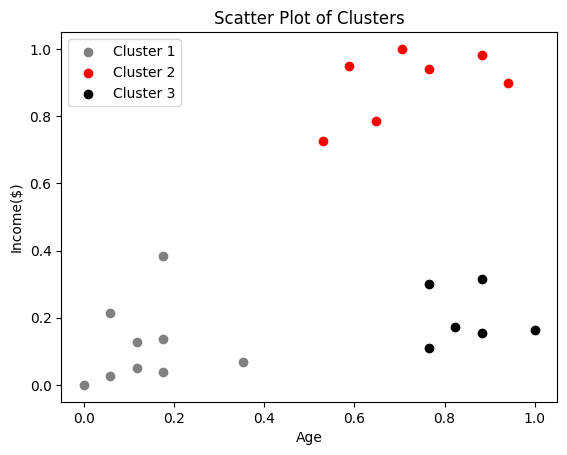

In [195]:
cluster1 = df[df['Cluster'] == 0]
cluster2 = df[df['Cluster'] == 1]
cluster3 = df[df['Cluster'] == 2]

plt.scatter(cluster1['Age'], cluster1['Income($)'], color='gray', label='Cluster 1')
plt.scatter(cluster2['Age'], cluster2['Income($)'], color='red', label='Cluster 2')
plt.scatter(cluster3['Age'], cluster3['Income($)'], color='black', label='Cluster 3')

plt.title('Scatter Plot of Clusters')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()

Oa clusters atendem o parâmetro de proximidade aos centróides, podemos achá-los e plotar : 

In [196]:
Kmeans.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

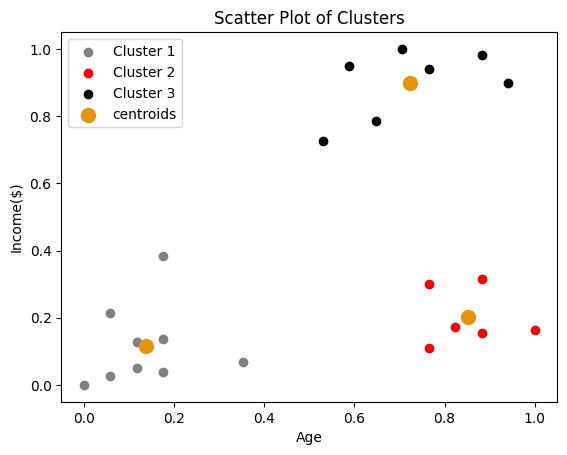

In [206]:
cluster1 = df[df['Cluster'] == 0]
cluster2 = df[df['Cluster'] == 1]
cluster3 = df[df['Cluster'] == 2]

plt.scatter(cluster1['Age'], cluster1['Income($)'], color='gray', label='Cluster 1')
plt.scatter(cluster2['Age'], cluster2['Income($)'], color='red', label='Cluster 2')
plt.scatter(cluster3['Age'], cluster3['Income($)'], color='black', label='Cluster 3')
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], color='#e69509', s=100, label='centroids')

plt.title('Scatter Plot of Clusters')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()

Elbow method normalizado:

In [200]:
sse2 = []

for k in range(1,11):
    km = KMeans(n_clusters=k, init='k-means++')
    km.fit(df[['Age', 'Income($)']])
    sse2.append(km.inertia_)
sse2

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.23014252862240328,
 0.2023628556500529,
 0.16199189075190915,
 0.11304517838728054,
 0.09039778695680273]

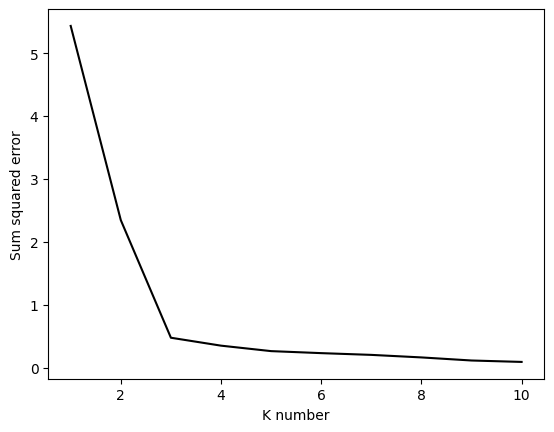

In [201]:
plt.plot(range(1,11), sse2, color='black')
plt.xlabel('K number')
plt.ylabel('Sum squared error')
plt.show()

Achamos portanto que realmente K é o número ideal de clusters segundo o modelo, lembrando que só podemos ter certeza se tivermos as labels ou tivermos conhecimento do negócio